In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Processing k=2...
Processing k=3...
Processing k=4...
Processing k=5...
Processing k=6...
Processing k=7...
Processing k=8...
Processing k=9...
Processing k=10...


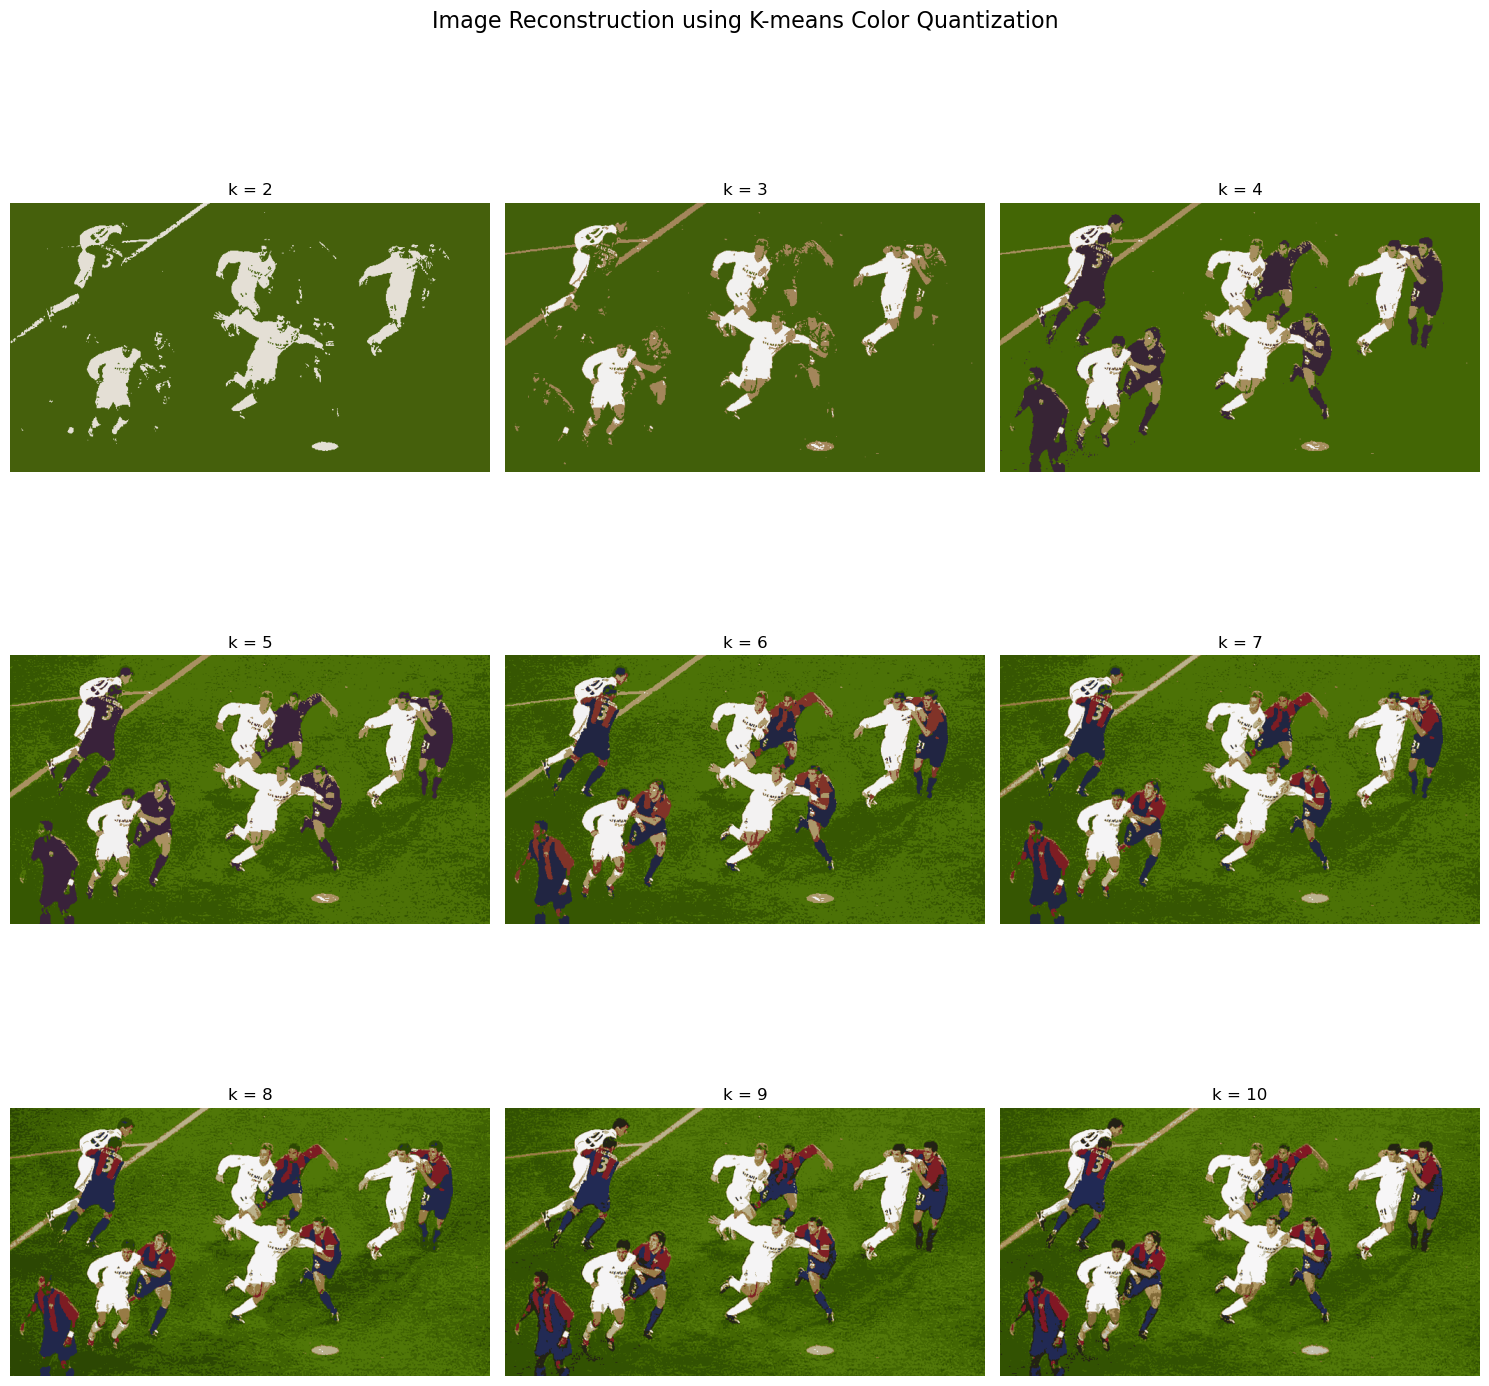

In [5]:
from sklearn.cluster import KMeans

def quantizize(image_path, k_values):
    # Read the image
    img = plt.imread(image_path)
    
    # Reshape the image to a 2D array of pixels
    pixels = img.reshape(-1, 3)
    
    # Create a 3x3 subplot grid
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()
    
    # Process each k value
    for i, k in enumerate(k_values):
        # Apply k-means
        print(f"Processing k={k}...")
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(pixels)
        
        # Get the colors from the codebook (centroids)
        colors = kmeans.cluster_centers_.astype(np.uint8)
        
        # Reconstruct the image using codebook colors
        reconstructed = colors[labels].reshape(img.shape)
        
        # Display the reconstructed image
        axes[i].imshow(reconstructed)
        axes[i].set_title(f'k = {k}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Image Reconstruction using K-means Color Quantization', y=1.02, fontsize=16)
    plt.show()
    
    return

# Run the function for k values from 2 to 10
quantizize('./data/soccer.jpg', range(2, 11))

# For smaller values of k the images are not well defined because only the major colors are shown
# For larger values of k the images are more detailed because more colors are allowed to be used, in turn preserving details we couldnt
# see with smaller values of k

Processing k=2...
Processing k=3...
Processing k=4...
Processing k=5...
Processing k=6...
Processing k=7...
Processing k=8...
Processing k=9...
Processing k=10...


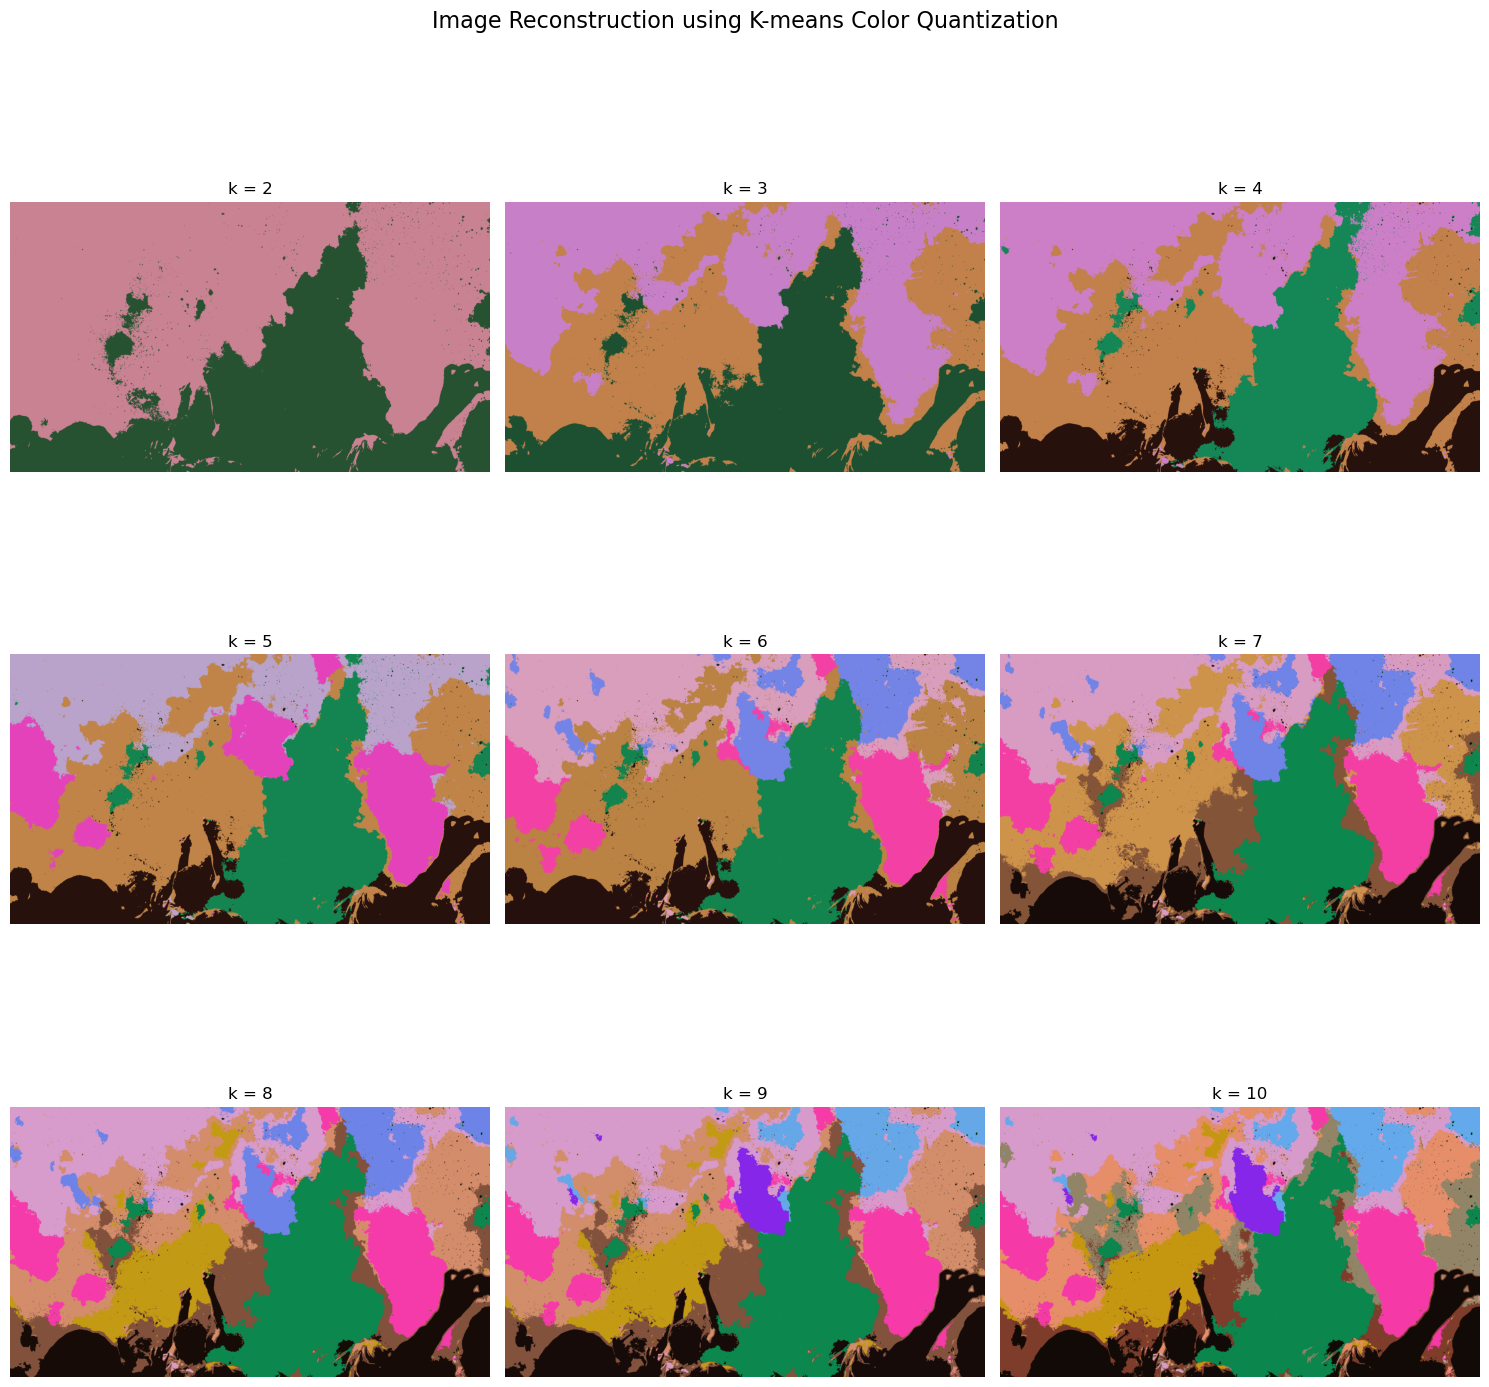

In [ ]:
# do the same for holi image
quantizize('./data/holi.jpg', range(2, 11))
# again we can see that with smaller values of k the image has less detail because only the major colors are shown
# with larger values of k we can again start seeing the details of the image.

Processing k=2...
Processing k=3...
Processing k=4...
Processing k=5...
Processing k=6...
Processing k=7...
Processing k=8...
Processing k=9...
Processing k=10...
Processing k=2...
Processing k=3...
Processing k=4...
Processing k=5...
Processing k=6...
Processing k=7...
Processing k=8...
Processing k=9...
Processing k=10...


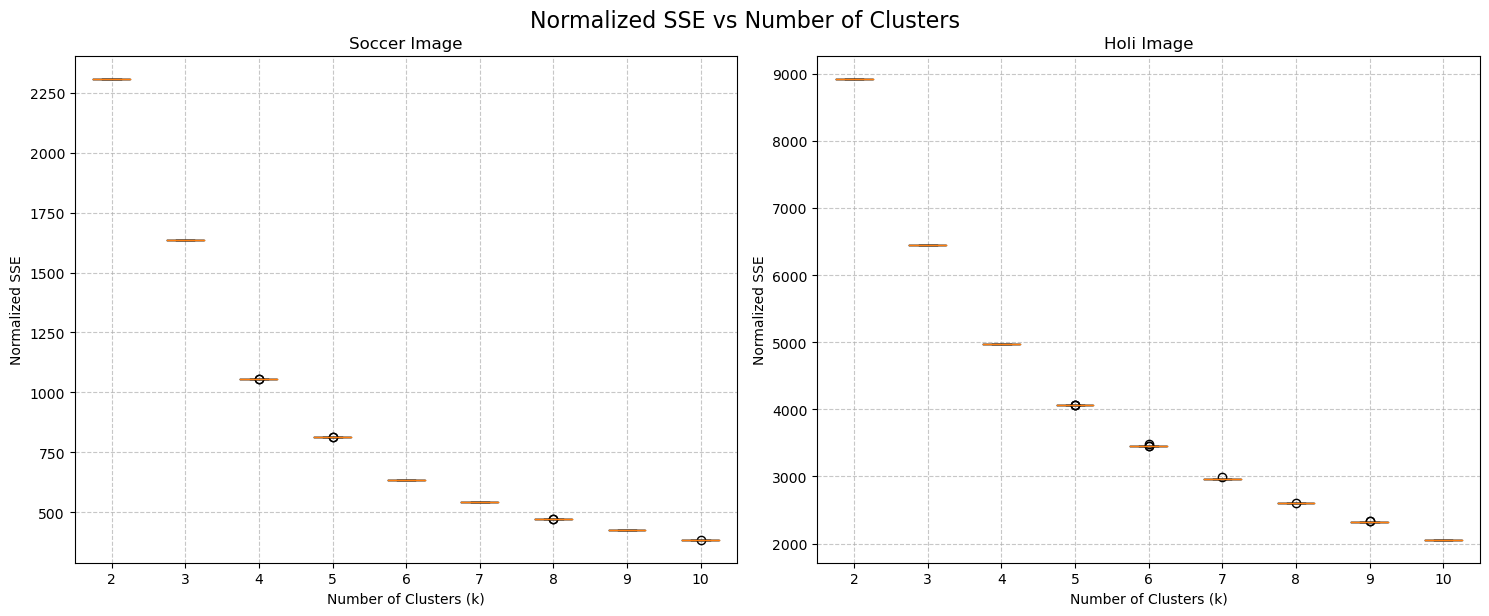

In [7]:
def calculate_sse(image_path, k_values, num_repeats=10):
    # Read the image
    img = plt.imread(image_path)
    
    # Reshape the image to a 2D array of pixels
    pixels = img.reshape(-1, 3)
    
    # Number of pixels (for normalization)
    num_pixels = pixels.shape[0]
    
    # Initialize results dictionary
    results = {k: [] for k in k_values}
    
    # Process each k value
    for k in k_values:
        print(f"Processing k={k}...")
        
        # Repeat for different random seeds
        for seed in range(num_repeats):
            # Apply k-means
            kmeans = KMeans(n_clusters=k, random_state=seed, n_init=10)
            labels = kmeans.fit_predict(pixels)
            
            # Get the colors from the codebook (centroids)
            colors = kmeans.cluster_centers_
            
            # Reconstruct the image
            reconstructed = colors[labels]
            
            # Calculate SSE
            sse = np.sum((pixels - reconstructed) ** 2)
            
            # Normalize SSE by number of pixels
            normalized_sse = sse / num_pixels
            
            # Store the result
            results[k].append(normalized_sse)
    
    return results

# Define k values to test
k_values = list(range(2, 11))

# Calculate SSE for both images
soccer_results = calculate_sse('./data/soccer.jpg', k_values)
holi_results = calculate_sse('./data/holi.jpg', k_values)

# Create box plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Convert results to format suitable for boxplot
soccer_data = [soccer_results[k] for k in k_values]
holi_data = [holi_results[k] for k in k_values]

# Soccer image
axes[0].boxplot(soccer_data)
axes[0].set_title('Soccer Image')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Normalized SSE')
axes[0].set_xticklabels(k_values)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Holi image
axes[1].boxplot(holi_data)
axes[1].set_title('Holi Image')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Normalized SSE')
axes[1].set_xticklabels(k_values)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.suptitle('Normalized SSE vs Number of Clusters', y=1.02, fontsize=16)
plt.show()

# Analysis:
# The box plots show how the normalized SSE decreases as k increases.
# This makes sense because with more clusters, we can represent the original image more accurately.
# The "elbow point" in the graph indicates the optimal k value where adding more clusters
# doesn't significantly reduce the error further.
# The variation in SSE across different runs (shown by the box heights) tends to decrease
# as k increases, suggesting that with higher k values, the algorithm becomes more stable.